11501568/11490434 [==============================] - 0s 0us/step
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


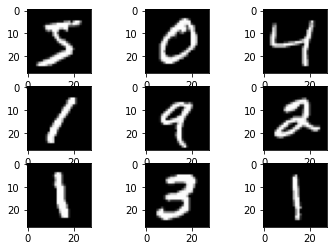

In [1]:
from keras.datasets import mnist
from matplotlib import pyplot
import keras

#loading the dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

#print the summaries of the sets
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
#plot first 9 images
for i in range(9):
	pyplot.subplot(330 + 1 + i)
	#plot the data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))

pyplot.show()

In [2]:
#function to load datasets
from tensorflow.keras import utils as np_utils
from tensorflow.keras.utils import to_categorical
def load_dataset():
	(trainX, trainY), (testX, testY) = mnist.load_data()
	#reshape dataset to have a single color channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	#one hot-encoding for y vals so that classification is easier
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [3]:
#normalize the data

def prep_pixels(train, test):
	#convert to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	#normalize to 0-1 so that there are no outliers and scale is equal
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	#return normalized sets
	return train_norm, test_norm

In [10]:
def define_model():
  model = Sequential()
 
  #add a CONV layer
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
	#add a pooling layer (type = max)
  model.add(MaxPooling2D((2, 2)))
	#flatten into a 1D array
  model.add(Flatten())
  #add dense layer with 100 nodes
  model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
	#add dense layer with 10 nodes
  model.add(Dense(10, activation='softmax'))
	#compile model with learning rate 0.01 and momentum 0.9
  opt = SGD(learning_rate=0.01, momentum=0.9)
  #define loss function and optimizer
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [11]:
#Evaluate model

#split data into 5 folds - used when there is limited sample data
def evaluate_model(dataX, dataY, n_folds=5):
  scores, histories = list(), list()
  kfold = KFold(n_folds, shuffle=True, random_state=1)
  for train_ix, test_ix in kfold.split(dataX):
	  model = define_model()
		#split datasets into training/testing
	  trainX, trainY, testX, testY = dataX[train_ix], dataY[train_ix], dataX[test_ix], dataY[test_ix]
		#fit model
	  history = model.fit(trainX, trainY, epochs=6, batch_size=32, validation_data=(testX, testY), verbose=2)
		#evaluate accuracy
	  _, acc = model.evaluate(testX, testY, verbose=2)
	  print('> %.3f' % (acc * 100.0))
		#store the scores
	  scores.append(acc)
	  histories.append(history)
  return scores, histories

In [12]:
#plotting train and test loss

def summarize_diagnostics(histories):
	for i in range(len(histories)):
		#plot loss
		pyplot.subplot(2, 1, 1)
		pyplot.title('Cross Entropy Loss')
    #training data
		pyplot.plot(histories[i].history['loss'], color='blue', label='train')
    #testing data
		pyplot.plot(histories[i].history['val_loss'], color='orange', label='test')
		#plot accuracy
		pyplot.subplot(2, 1, 2)
		pyplot.title('Classification Accuracy')
		pyplot.plot(histories[i].history['accuracy'], color='blue', label='train')
		pyplot.plot(histories[i].history['val_accuracy'], color='orange', label='test')
	pyplot.show()

In [13]:
#summarize model performance
def summarize_performance(scores):
	#print summary percentages
	print('Accuracy: mean=%.3f std=%.3f, n=%d' %(mean(scores)*100, std(scores)*100, len(scores)))
	#box and whisker plots of results
	pyplot.boxplot(scores)
	pyplot.show()

In [14]:
#functions to call all of the functions previously defined
def run_test_harness():
	trainX, trainY, testX, testY = load_dataset()
	trainX, testX = prep_pixels(trainX, testX)
 #evaluate
	scores, histories = evaluate_model(trainX, trainY)
 #learning curves
	summarize_diagnostics(histories)
 #estimated performances
	summarize_performance(scores)

Epoch 1/6
1500/1500 - 117s - loss: 0.1357 - accuracy: 0.9580 - val_loss: 0.0811 - val_accuracy: 0.9758
Epoch 2/6
1500/1500 - 117s - loss: 0.0441 - accuracy: 0.9865 - val_loss: 0.0545 - val_accuracy: 0.9850
Epoch 3/6
1500/1500 - 118s - loss: 0.0264 - accuracy: 0.9915 - val_loss: 0.0516 - val_accuracy: 0.9868
Epoch 4/6
1500/1500 - 118s - loss: 0.0168 - accuracy: 0.9948 - val_loss: 0.0477 - val_accuracy: 0.9881
Epoch 5/6
1500/1500 - 118s - loss: 0.0122 - accuracy: 0.9960 - val_loss: 0.0477 - val_accuracy: 0.9878
Epoch 6/6
1500/1500 - 118s - loss: 0.0092 - accuracy: 0.9968 - val_loss: 0.0582 - val_accuracy: 0.9872
375/375 - 6s - loss: 0.0582 - accuracy: 0.9872
> 98.725
Epoch 1/6
1500/1500 - 120s - loss: 0.1367 - accuracy: 0.9572 - val_loss: 0.0979 - val_accuracy: 0.9701
Epoch 2/6
1500/1500 - 119s - loss: 0.0459 - accuracy: 0.9855 - val_loss: 0.0490 - val_accuracy: 0.9847
Epoch 3/6
1500/1500 - 121s - loss: 0.0300 - accuracy: 0.9905 - val_loss: 0.0424 - val_accuracy: 0.9872
Epoch 4/6
1500/15

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


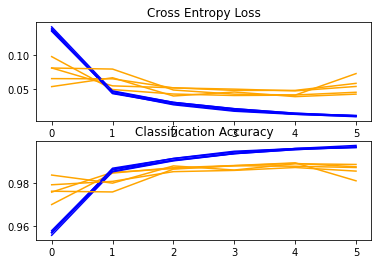

Accuracy: mean=98.603 std=0.267, n=5


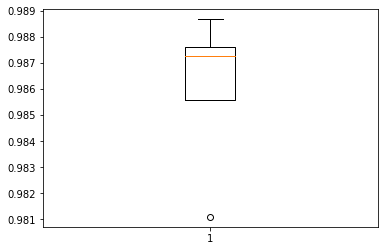

In [15]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
run_test_harness()